# Imbalanced Dataset and Alpha=10 IID

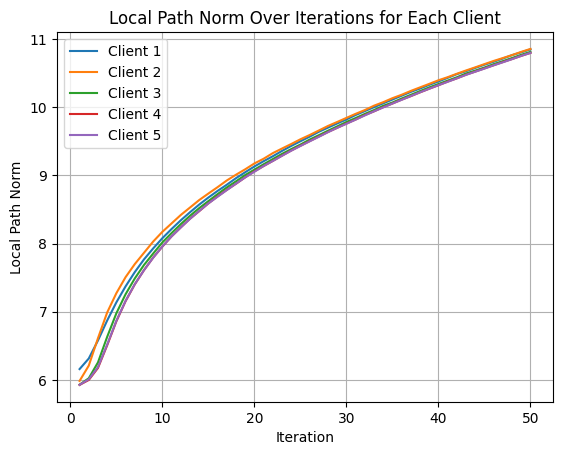

In [1]:
import json
import matplotlib.pyplot as plt

# 定义文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_1_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_2_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_3_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_4_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_5_10.0.json"
]

# 初始化列表存储每个客户端的 local_path_norm
all_local_path_norms = []

# 从文件中读取 local_path_norm 值
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        # 提取 local_path_norm 值
        local_path_norms = [entry['local_path_norm'] for entry in data]
        # 在开头插入指定的值
        all_local_path_norms.append(local_path_norms)

# 绘制折线图，每个客户端一条线
for i, local_path_norms in enumerate(all_local_path_norms):
    iterations = range(1, len(local_path_norms) + 1)
    plt.plot(iterations, local_path_norms, linestyle='-', label=f'Client {i+1}')

plt.xlabel('Iteration')
plt.ylabel('Local Path Norm')
plt.title('Local Path Norm Over Iterations for Each Client')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/1354167030.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(all_labels))


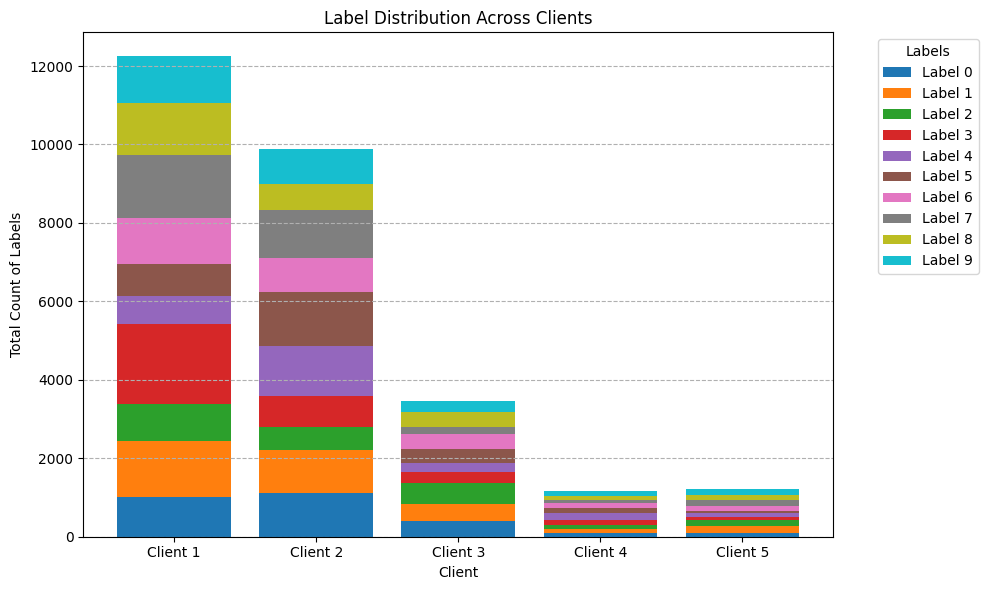

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 定义客户端的标签数据
clients_labels = {
    "Client 1": {"Label 0": 1007, "Label 1": 1437, "Label 2": 929, "Label 3": 2054, "Label 4": 719, 
                 "Label 5": 803, "Label 6": 1180, "Label 7": 1601, "Label 8": 1322, "Label 9": 1195},
    "Client 2": {"Label 0": 1110, "Label 1": 1102, "Label 2": 583, "Label 3": 784, "Label 4": 1296,
                 "Label 5": 1367, "Label 6": 875, "Label 7": 1218, "Label 8": 660, "Label 9": 897},
    "Client 3": {"Label 0": 408, "Label 1": 431, "Label 2": 535, "Label 3": 264, "Label 4": 252,
                 "Label 5": 359, "Label 6": 363, "Label 7": 179, "Label 8": 399, "Label 9": 277},
    "Client 4": {"Label 0": 97, "Label 1": 97, "Label 2": 116, "Label 3": 117, "Label 4": 172,
                 "Label 5": 122, "Label 6": 134, "Label 7": 84, "Label 8": 97, "Label 9": 135},
    "Client 5": {"Label 0": 100, "Label 1": 175, "Label 2": 142, "Label 3": 90, "Label 4": 101,
                 "Label 5": 53, "Label 6": 124, "Label 7": 147, "Label 8": 130, "Label 9": 146}
}

# 获取客户端名称
clients = list(clients_labels.keys())

# 获取所有可能的标签
all_labels = sorted(set(label for client in clients_labels.values() for label in client))

# 准备堆叠柱状图的数据
data = {label: [clients_labels[client].get(label, 0) for client in clients] for label in all_labels}

# 定义颜色
colors = plt.cm.get_cmap('tab10', len(all_labels))

# 创建堆叠柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 用于底部的累计值
cumulative_values = np.zeros(len(clients))

# 绘制堆叠的柱状图
for i, label in enumerate(all_labels):
    values = data[label]
    ax.bar(clients, values, bottom=cumulative_values, label=label, color=colors(i))
    cumulative_values += values

# 图表设置
ax.set_xlabel('Client')
ax.set_ylabel('Total Count of Labels')
ax.set_title('Label Distribution Across Clients')
ax.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--')

# 调整布局以避免图例遮挡
plt.tight_layout()
plt.show()

Label: 0, Count: 1007, Percentage: 8.22%
Label: 1, Count: 1437, Percentage: 11.73%
Label: 2, Count: 929, Percentage: 7.59%
Label: 3, Count: 2054, Percentage: 16.77%
Label: 4, Count: 719, Percentage: 5.87%
Label: 5, Count: 803, Percentage: 6.56%
Label: 6, Count: 1180, Percentage: 9.64%
Label: 7, Count: 1601, Percentage: 13.07%
Label: 8, Count: 1322, Percentage: 10.79%
Label: 9, Count: 1195, Percentage: 9.76%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/73854168.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/5cl

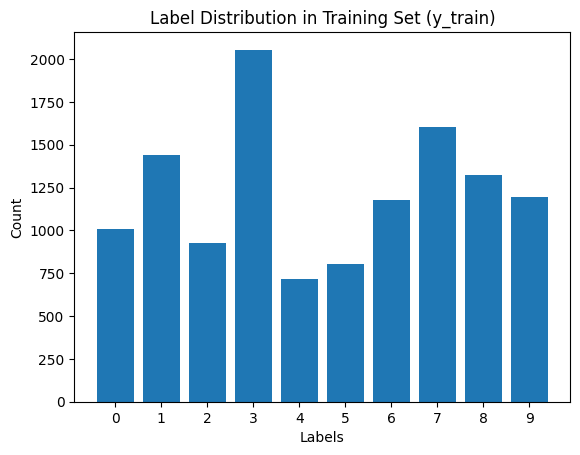

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/clients_data/1/mnist.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

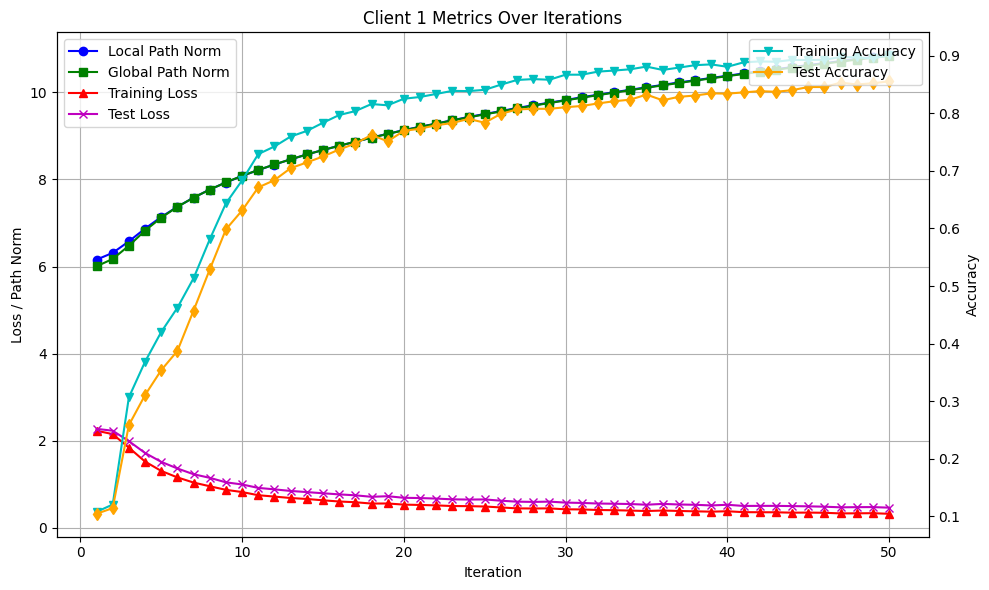

In [4]:
import json
import matplotlib.pyplot as plt

# 定义文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_1_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/report_1_10.0.json"
]

# 读取客户端1的local_path_norm数据
# with open(file_paths[0], 'r') as file:
#     data = json.load(file)
#     client1_local_path_norm = [entry['local_path_norm'] for entry in data]


# 从客户端1的report文件读取数据
client1_local_path_norm = all_local_path_norms[0]
client1_global_path_norm = []
client1_training_loss = []
client1_training_accuracy = []
client1_test_loss = []
client1_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client1_global_path_norm = [entry['global_path_norm'] for entry in data]
    client1_training_loss = [entry['training_loss'] for entry in data]
    client1_training_accuracy = [entry['training_accuracy'] for entry in data]
    client1_test_loss = [entry['test_loss'] for entry in data]
    client1_test_accuracy = [entry['test_accuracy'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(local_path_norms) + 1)
# 左边Y轴的数据
ax1.plot(iterations,client1_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations,client1_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations,client1_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations,client1_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 1 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations,client1_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations,client1_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()


Label: 0, Count: 1110, Percentage: 11.22%
Label: 1, Count: 1102, Percentage: 11.14%
Label: 2, Count: 583, Percentage: 5.89%
Label: 3, Count: 784, Percentage: 7.93%
Label: 4, Count: 1296, Percentage: 13.10%
Label: 5, Count: 1367, Percentage: 13.82%
Label: 6, Count: 875, Percentage: 8.85%
Label: 7, Count: 1218, Percentage: 12.31%
Label: 8, Count: 660, Percentage: 6.67%
Label: 9, Count: 897, Percentage: 9.07%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/2687249052.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/5

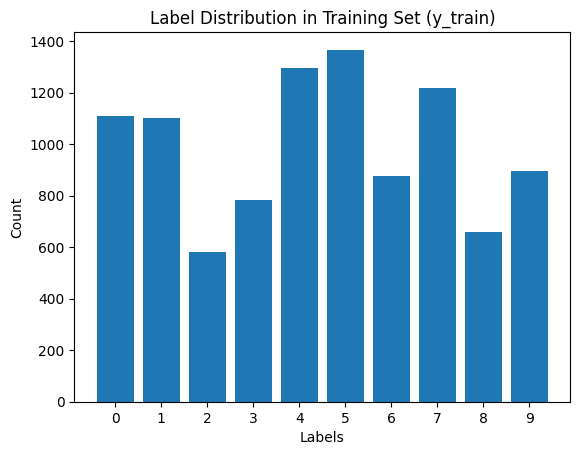

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/clients_data/2/mnist.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

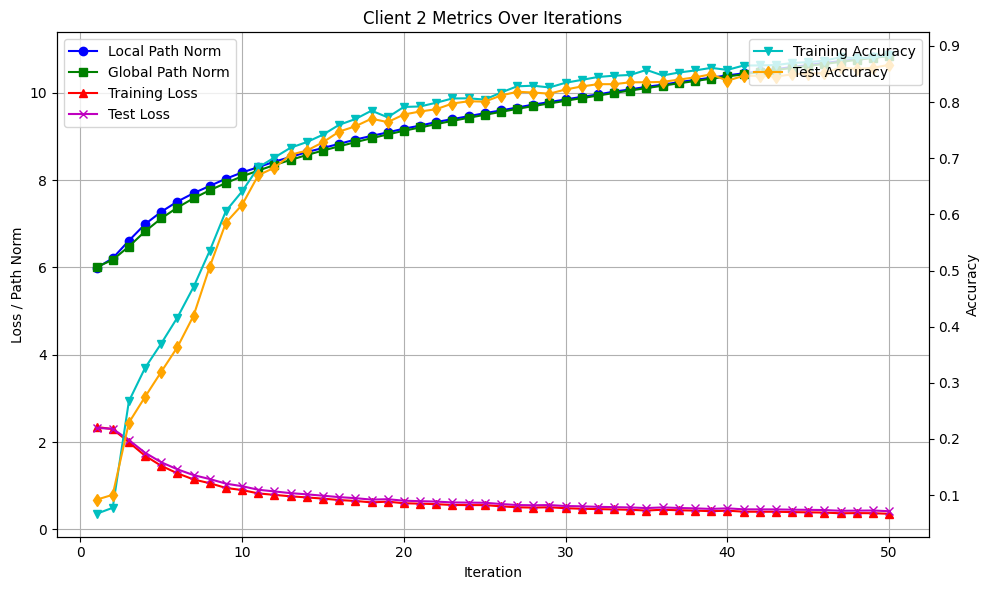

In [6]:
import json
import matplotlib.pyplot as plt

# 定义客户端2的文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_2_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/report_2_10.0.json"
]

# 从文件中读取客户端2的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client2_local_path_norm = [entry['local_path_norm'] for entry in data]

# 从客户端2的 report 文件读取数据
client2_global_path_norm = []
client2_training_loss = []
client2_training_accuracy = []
client2_test_loss = []
client2_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client2_global_path_norm = [entry['global_path_norm'] for entry in data]
    client2_training_loss = [entry['training_loss'] for entry in data]
    client2_training_accuracy = [entry['training_accuracy'] for entry in data]
    client2_test_loss = [entry['test_loss'] for entry in data]
    client2_test_accuracy = [entry['test_accuracy'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client2_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client2_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client2_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client2_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client2_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 2 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client2_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client2_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()


Label: 0, Count: 408, Percentage: 11.77%
Label: 1, Count: 431, Percentage: 12.43%
Label: 2, Count: 535, Percentage: 15.43%
Label: 3, Count: 264, Percentage: 7.61%
Label: 4, Count: 252, Percentage: 7.27%
Label: 5, Count: 359, Percentage: 10.35%
Label: 6, Count: 363, Percentage: 10.47%
Label: 7, Count: 179, Percentage: 5.16%
Label: 8, Count: 399, Percentage: 11.51%
Label: 9, Count: 277, Percentage: 7.99%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/3509152981.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/5

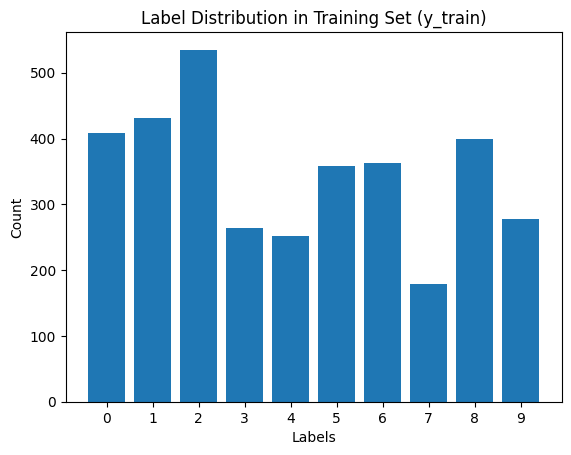

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/clients_data/3/mnist.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

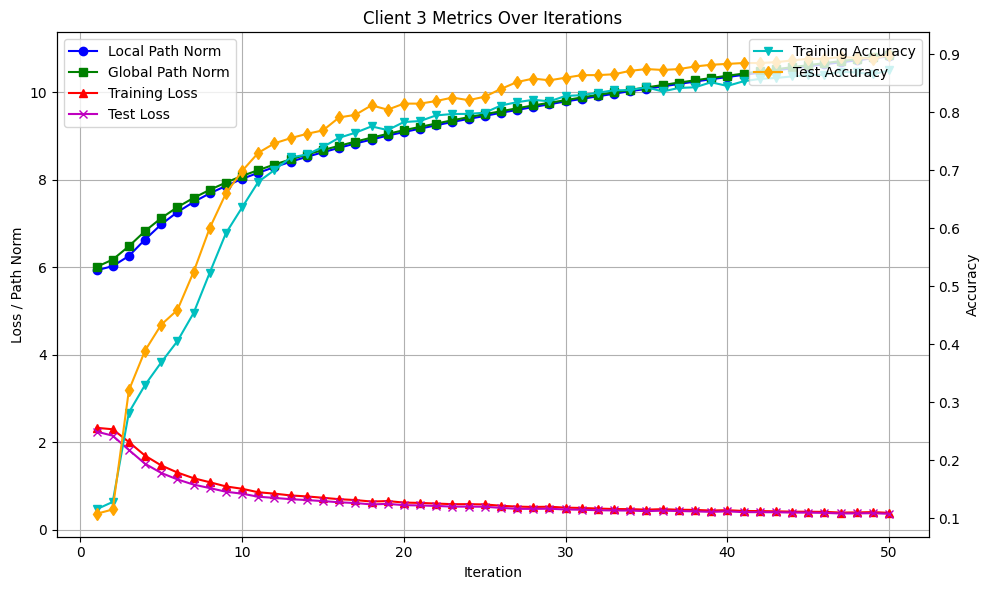

In [8]:
import json
import matplotlib.pyplot as plt

# 定义客户端3的文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_3_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/report_3_10.0.json"
]

# 从文件中读取客户端3的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client3_local_path_norm = [entry['local_path_norm'] for entry in data]

# 从客户端3的 report 文件读取数据
client3_global_path_norm = []
client3_training_loss = []
client3_training_accuracy = []
client3_test_loss = []
client3_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client3_global_path_norm = [entry['global_path_norm'] for entry in data]
    client3_training_loss = [entry['training_loss'] for entry in data]
    client3_training_accuracy = [entry['training_accuracy'] for entry in data]
    client3_test_loss = [entry['test_loss'] for entry in data]
    client3_test_accuracy = [entry['test_accuracy'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client3_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client3_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client3_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client3_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client3_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 3 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client3_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client3_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()

Label: 0, Count: 97, Percentage: 8.28%
Label: 1, Count: 97, Percentage: 8.28%
Label: 2, Count: 116, Percentage: 9.91%
Label: 3, Count: 117, Percentage: 9.99%
Label: 4, Count: 172, Percentage: 14.69%
Label: 5, Count: 122, Percentage: 10.42%
Label: 6, Count: 134, Percentage: 11.44%
Label: 7, Count: 84, Percentage: 7.17%
Label: 8, Count: 97, Percentage: 8.28%
Label: 9, Count: 135, Percentage: 11.53%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/2443582530.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/5

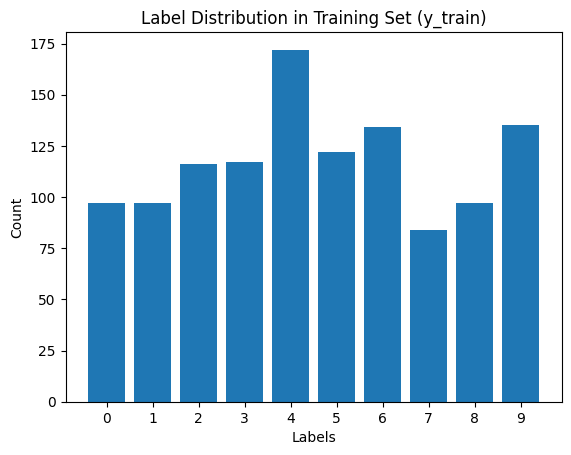

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/clients_data/4/mnist.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

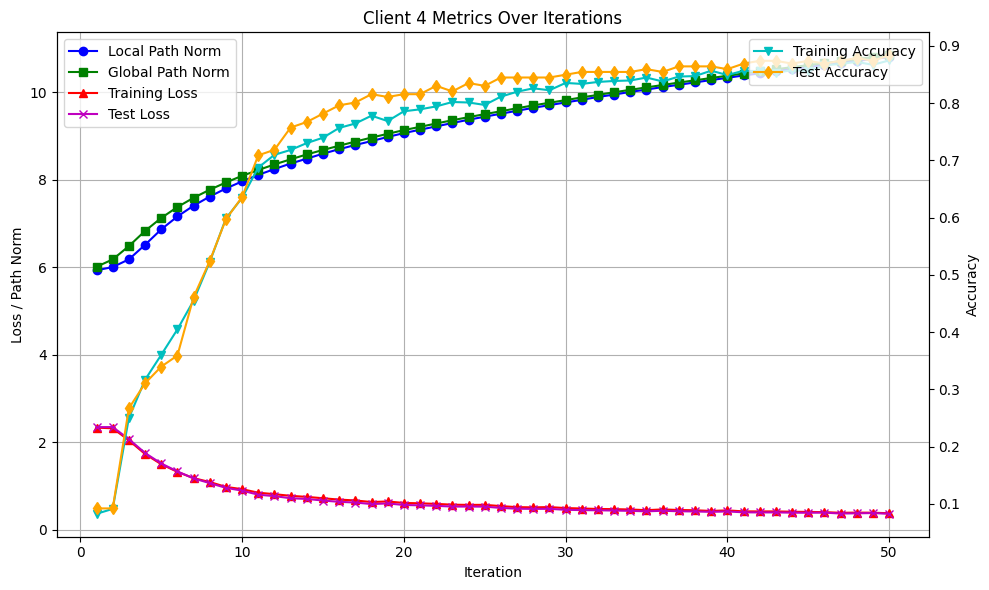

In [10]:
import json
import matplotlib.pyplot as plt

# 定义客户端4的文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_4_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/report_4_10.0.json"
]

# 从文件中读取客户端4的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client4_local_path_norm = [entry['local_path_norm'] for entry in data]

# 从客户端4的 report 文件读取数据
client4_global_path_norm = []
client4_training_loss = []
client4_training_accuracy = []
client4_test_loss = []
client4_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client4_global_path_norm = [entry['global_path_norm'] for entry in data]
    client4_training_loss = [entry['training_loss'] for entry in data]
    client4_training_accuracy = [entry['training_accuracy'] for entry in data]
    client4_test_loss = [entry['test_loss'] for entry in data]
    client4_test_accuracy = [entry['test_accuracy'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client4_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client4_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client4_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client4_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client4_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 4 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client4_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client4_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()

Label: 0, Count: 100, Percentage: 8.28%
Label: 1, Count: 175, Percentage: 14.49%
Label: 2, Count: 142, Percentage: 11.75%
Label: 3, Count: 90, Percentage: 7.45%
Label: 4, Count: 101, Percentage: 8.36%
Label: 5, Count: 53, Percentage: 4.39%
Label: 6, Count: 124, Percentage: 10.26%
Label: 7, Count: 147, Percentage: 12.17%
Label: 8, Count: 130, Percentage: 10.76%
Label: 9, Count: 146, Percentage: 12.09%


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_60810/479239937.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load('/Users/max/Fedn_Project/5c

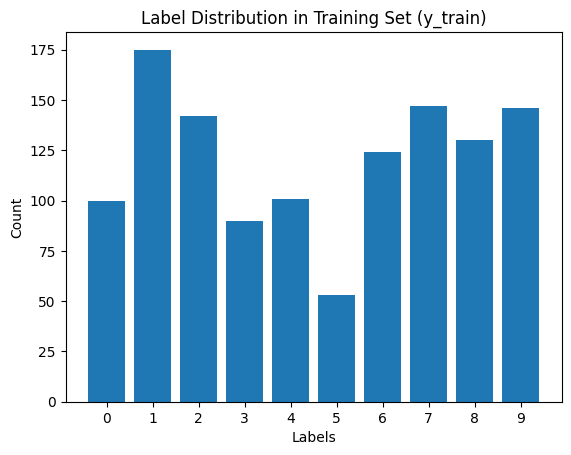

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_label_distribution(labels, title='Label Distribution'):
    """
    统计并可视化标签的数量及占比。

    参数：
    labels (torch.Tensor 或 np.array): 标签数据。
    title (str): 可视化图表的标题。
    """
    # 将标签转换为 NumPy 数组
    labels_np = labels.numpy() if isinstance(labels, torch.Tensor) else np.array(labels)

    # 使用 NumPy 统计每个标签的数量
    unique_labels, counts = np.unique(labels_np, return_counts=True)

    # 打印每个标签的数量及其占比
    total_count = len(labels_np)
    for label, count in zip(unique_labels, counts):
        percentage = (count / total_count) * 100
        print(f"Label: {label}, Count: {count}, Percentage: {percentage:.2f}%")

    # 可视化标签的数量
    plt.bar(unique_labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(unique_labels)
    plt.show()

data = torch.load('/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/clients_data/5/mnist.pt')
y_train = data['y_train']
plot_label_distribution(y_train, title='Label Distribution in Training Set (y_train)')

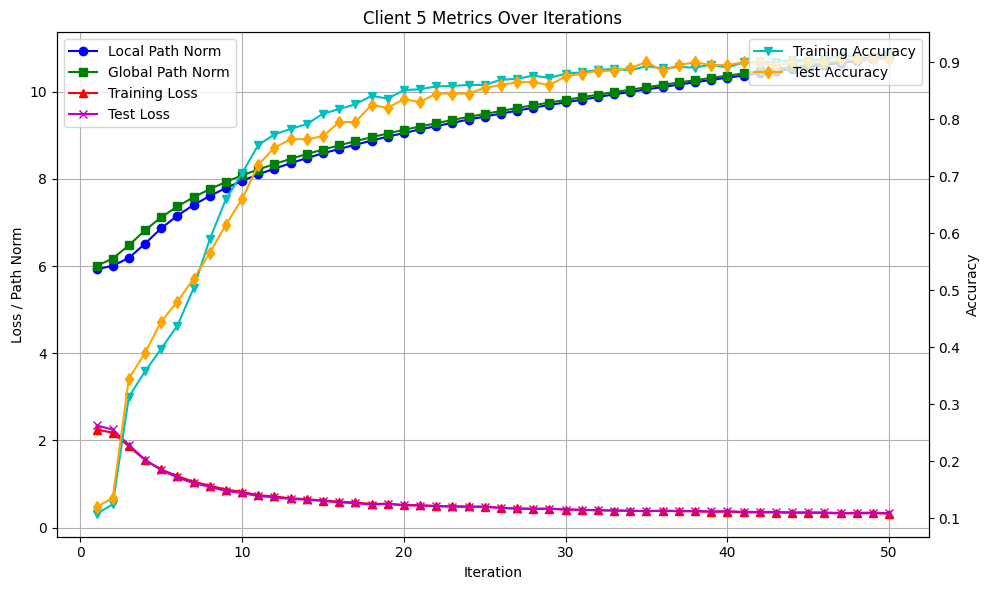

In [12]:
import json
import matplotlib.pyplot as plt

# 定义客户端5的文件路径
file_paths = [
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/metadata_5_10.0.json",
    "/Users/max/Fedn_Project/5clients_50rounds_im(10_08_03_01_01)_IID(Alpha=10)/report_5_10.0.json"
]

# 从文件中读取客户端5的 local_path_norm 数据
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client5_local_path_norm = [entry['local_path_norm'] for entry in data]

# 从客户端5的 report 文件读取数据
client5_global_path_norm = []
client5_training_loss = []
client5_training_accuracy = []
client5_test_loss = []
client5_test_accuracy = []

with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client5_global_path_norm = [entry['global_path_norm'] for entry in data]
    client5_training_loss = [entry['training_loss'] for entry in data]
    client5_training_accuracy = [entry['training_accuracy'] for entry in data]
    client5_test_loss = [entry['test_loss'] for entry in data]
    client5_test_accuracy = [entry['test_accuracy'] for entry in data]

# 创建图形和双Y轴
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client5_local_path_norm) + 1)

# 左边Y轴的数据
ax1.plot(iterations, client5_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client5_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client5_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client5_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 5 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# 右边Y轴的数据
ax2 = ax1.twinx()
ax2.plot(iterations, client5_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client5_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()